In [73]:
import cv2
import imageio
import numpy as np

In [61]:
def histogram(image, levels):
    hist, _ = np.histogram(image, bins=np.arange(levels + 1))
    return hist

In [76]:
def equalise_image_histogram(image, image_hist, levels):
    m, n = image.shape
    cumulative_histogram = image_hist.cumsum()
    print(f'{cumulative_histogram.shape = }')
    eq_image = np.zeros((m, n), dtype=np.uint8)

    for i in range(levels):
        s = ((levels - 1)/float(m * n))*cumulative_histogram[i]

        eq_image[np.where(image == i)] = s.astype(np.uint8)
    
    return eq_image

In [77]:
image = cv2.imread('/home/hbritto/Pictures/test_images/horizontal_crops_kmeans/alimentares.jpg', cv2.IMREAD_GRAYSCALE)
print(f'{image.dtype = }, {image.shape = }, {image.min() = }, {image.max() = }')
levels = 256
hist = histogram(image, levels)
print(f'{hist.shape = }')

equalised_image = equalise_image_histogram(image, hist, levels)


image.dtype = dtype('uint8'), image.shape = (27, 150), image.min() = 87, image.max() = 132
hist.shape = (256,)
cumulative_histogram.shape = (256,)


(-0.5, 149.5, 26.5, -0.5)

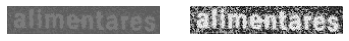

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalised_image, cmap="gray", vmin=0, vmax=255)
plt.axis('off')